# MNIST Softmax Estimation

Note: This notebook is desinged to run with Python3 and CPU (no GPU) runtime.

![Python 3 and CPU runtime](https://raw.githubusercontent.com/enakai00/colab_tfbook/master/docs/imgs/runtime_cpu.png)

This notebook uses TensorFlow2.x.

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


####[MSE-01]
Import modules.

In [2]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

####[MSE-02]
Download the MNIST dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

11490434/11490434 [==============================] - 0s 0us/step


####[MSE-03]
Define a model for the softmax estimation.

In [4]:
model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(28*28,),
                       name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 softmax (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


####[MSE-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [5]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MSE-05]
Train the model. It acheves the 92.7% accuracy for the test dataset.

In [6]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 7s 12ms/step - loss: 0.6680 - acc: 0.8351 - val_loss: 0.3826 - val_acc: 0.9003
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.3614 - acc: 0.9023 - val_loss: 0.3191 - val_acc: 0.9125
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3193 - acc: 0.9122 - val_loss: 0.2968 - val_acc: 0.9160
Epoch 4/10
469/469 [==============================] - 4s 8ms/step - loss: 0.2996 - acc: 0.9167 - val_loss: 0.2865 - val_acc: 0.9185
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2879 - acc: 0.9196 - val_loss: 0.2806 - val_acc: 0.9215
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2798 - acc: 0.9221 - val_loss: 0.2738 - val_acc: 0.9226
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2738 - acc: 0.9234 - val_loss: 0.2741 - val_acc: 0.9244
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 

####[MSE-06]
Show examples of the prediction result. Three for correct preditions and three for incorrect predictions.

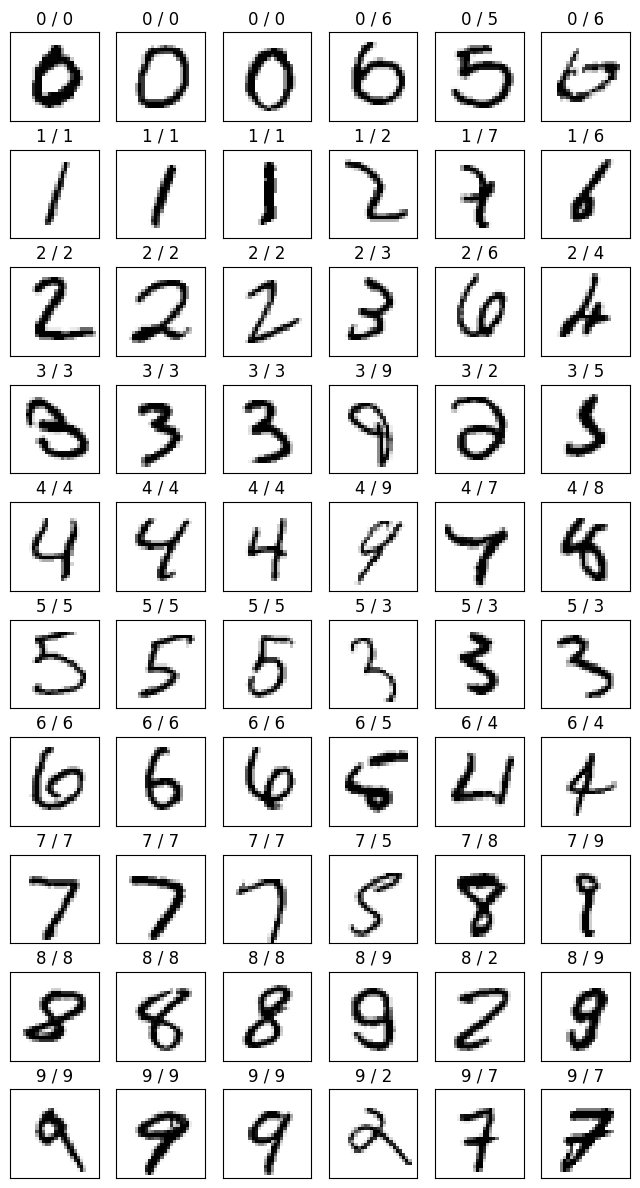

In [8]:
p_val = model.predict(np.array(test_images), verbose=0)
df = DataFrame({'pred': list(map(np.argmax, p_val)),
                'label': list(map(np.argmax, test_labels))})
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    indices = list(correct[correct['pred']==i].index[:3]) \
                + list(incorrect[incorrect['pred']==i].index[:3])
    for c, image in enumerate(test_images[indices]):
        subplot = fig.add_subplot(10, 6, i*6+c+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d / %d' % (i, df['label'][indices[c]]))
        subplot.imshow(image.reshape((28, 28)),
                       vmin=0, vmax=1, cmap=plt.cm.gray_r)